In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import shap

In [3]:
df = pd.read_csv('WineQT.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
# Dropping the unnecesary ID column
df.drop('Id', axis=1, inplace=True)

## Exploratory Data Analysis

In [362]:
# Quality classes only go from 3 - 8
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

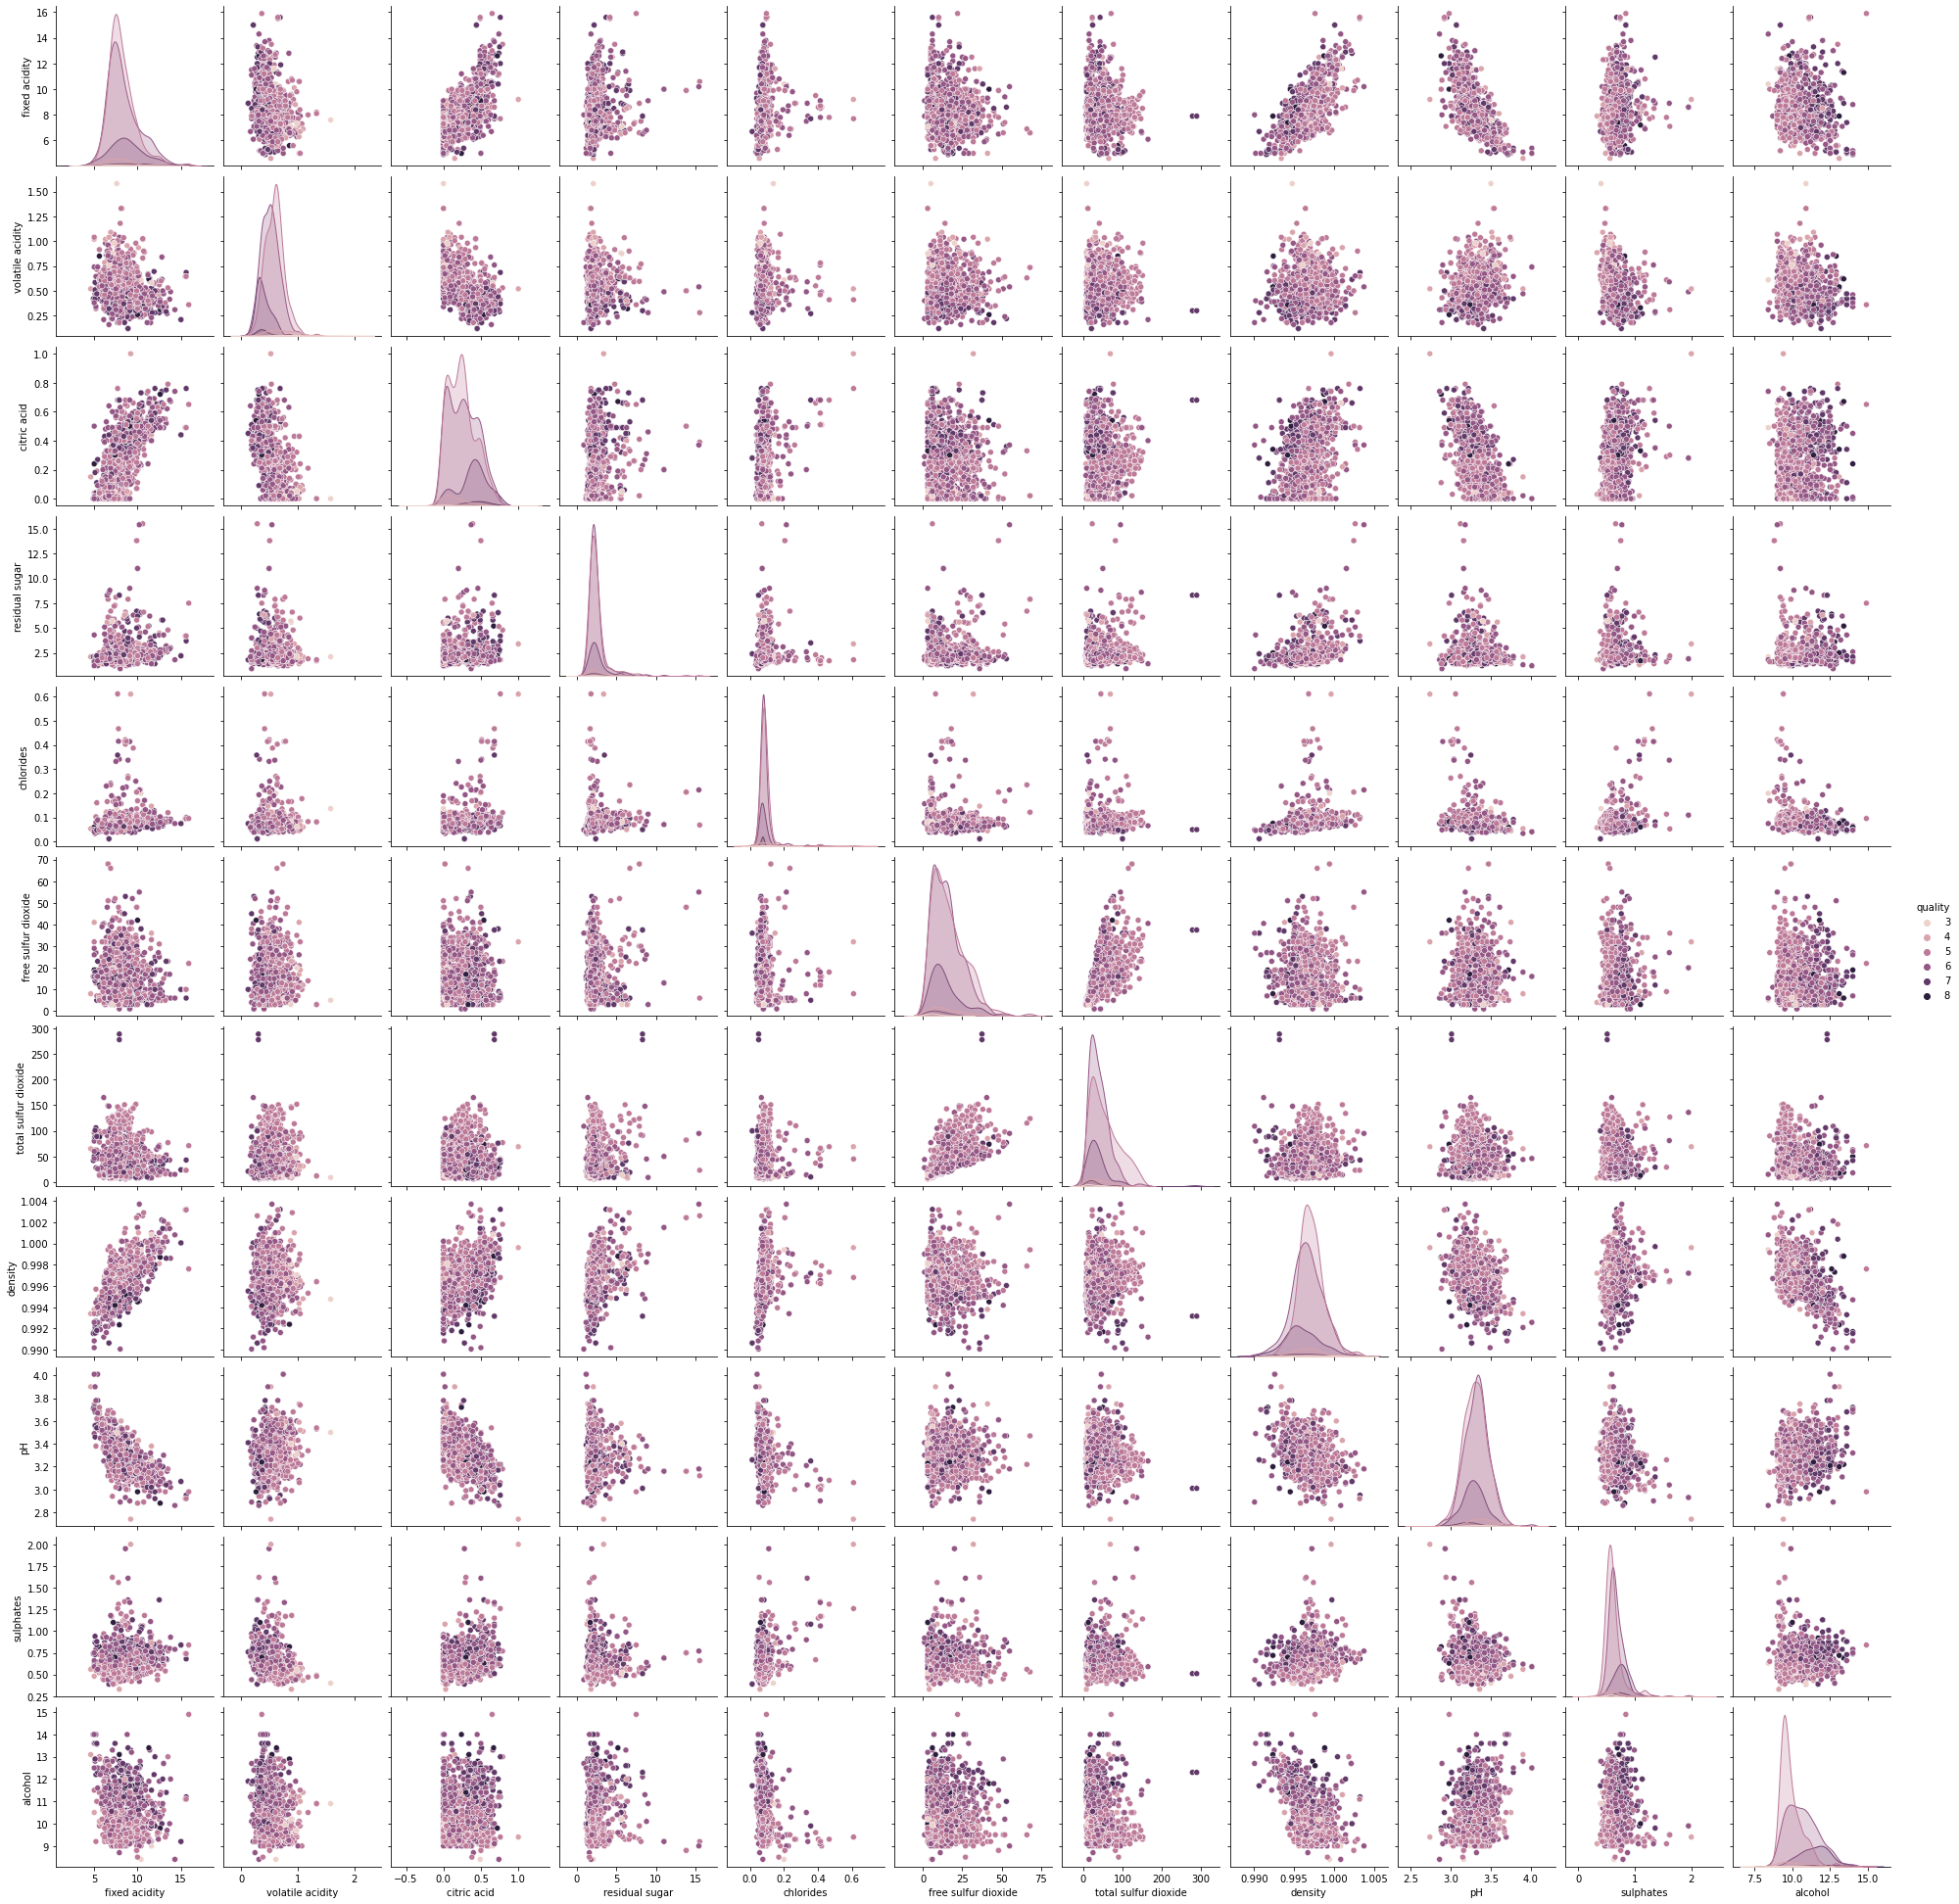

In [375]:
# Pairplot to quickly check for relationships between features
sns.pairplot(df, hue='quality')

In [363]:
# Checking Pearson correlation between features and quality. Volatile acidity and Alcohol are the features with the highest correlation (absolute).
df.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

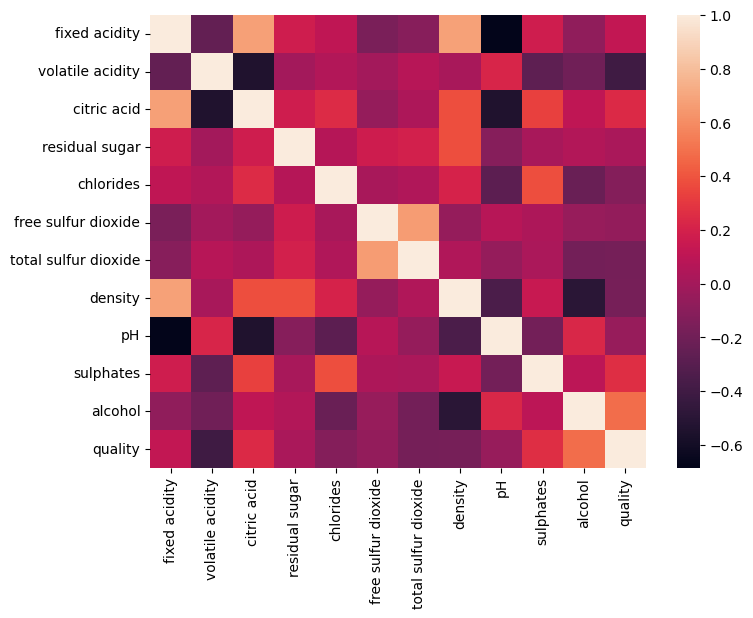

In [19]:
# Heatmap of the correlation of the features
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(df.corr())

Creating boxplots and lineplots for the features with the highest correlation to quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

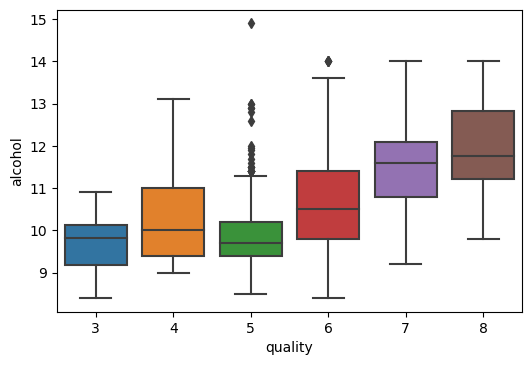

In [393]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(data=df, x='quality', y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

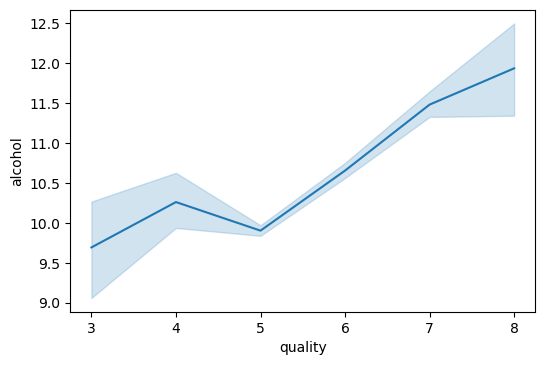

In [394]:
plt.figure(figsize=(6,4), dpi=100)
sns.lineplot(data=df, x='quality', y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

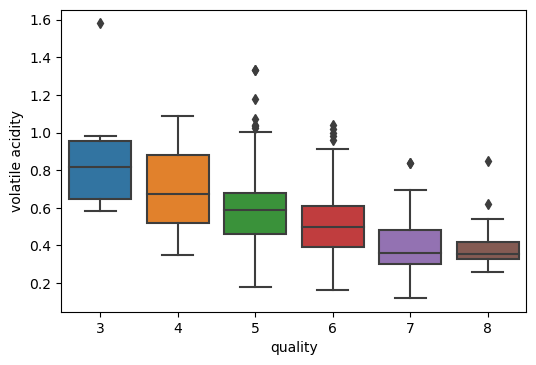

In [395]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(data=df, x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

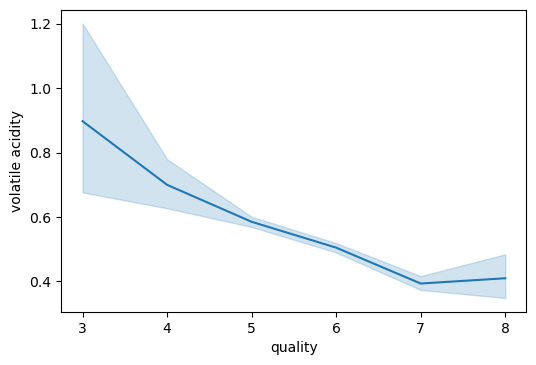

In [396]:
plt.figure(figsize=(6,4), dpi=100)
sns.lineplot(data=df, x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

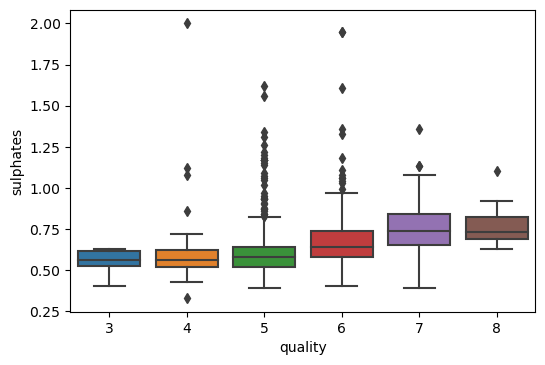

In [397]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(data=df, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

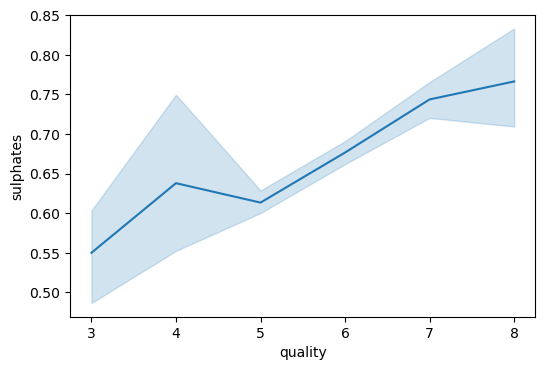

In [398]:
plt.figure(figsize=(6,4), dpi=100)
sns.lineplot(data=df, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

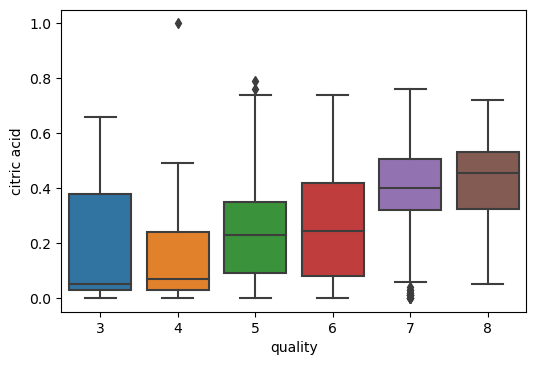

In [399]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(data=df, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

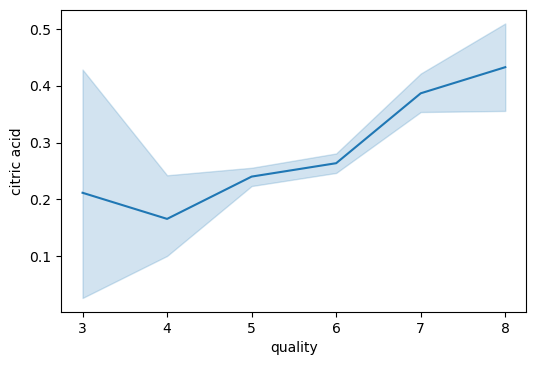

In [400]:
plt.figure(figsize=(6,4), dpi=100)
sns.lineplot(data=df, x='quality', y='citric acid')

## Predictive Modeling

In [38]:
# Separating data into X features and y label.
X = df.drop('quality', axis=1)
y = df['quality']

In [239]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [240]:
# Scaling the data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [338]:
# Testing different models (XGBoost, Random Forest and K-Nearest Neighbors)
xgb = XGBClassifier(random_state=101)
rfc = RandomForestClassifier(random_state=101)
knn = KNeighborsClassifier()
models = [xgb, rfc, knn]

for model in models:
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    print(f'{type(model).__name__}')
    print(classification_report(y_test, y_pred, zero_division=1))

C:\Users\alexi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.74      0.74       149
           6       0.63      0.66      0.64       139
           7       0.53      0.48      0.50        42
           8       0.14      0.50      0.22         2

    accuracy                           0.65       343
   macro avg       0.51      0.40      0.35       343
weighted avg       0.64      0.65      0.65       343

RandomForestClassifier
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
    

In [339]:
rfc_model = RandomForestClassifier(random_state=101)

In [347]:
#Random Forest Classifiers had the results in general. Now a Grid Search will be performed to find the best parameters and see if we can improve the results for RFC.
param_grid = {'n_estimators': [100, 150],
             'max_features': [4, 5, 6],
             }

In [348]:
grid = GridSearchCV(rfc_model, param_grid)

In [349]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_features': [4, 5, 6], 'n_estimators': [100, 150]})

In [350]:
grid.best_params_

{'max_features': 4, 'n_estimators': 150}

In [351]:
grid_preds = grid.predict(scaled_X_test)

In [352]:
print(classification_report(y_test, grid_preds, zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.73      0.74      0.74       149
           6       0.64      0.71      0.67       139
           7       0.68      0.55      0.61        42
           8       0.50      0.50      0.50         2

    accuracy                           0.68       343
   macro avg       0.76      0.42      0.42       343
weighted avg       0.69      0.68      0.67       343



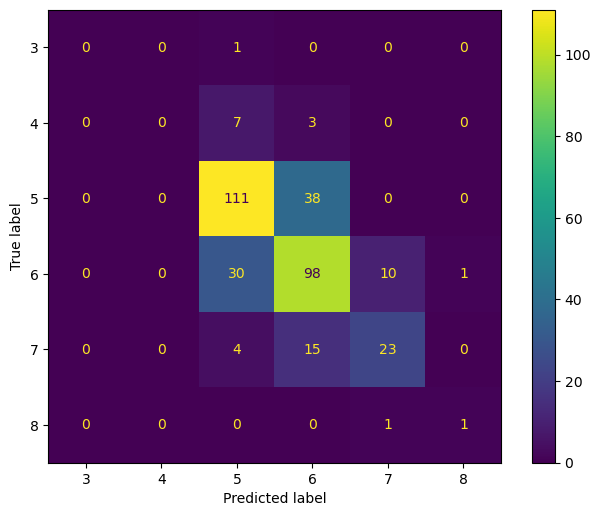

In [387]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ConfusionMatrixDisplay.from_estimator(grid, scaled_X_test, y_test, ax=ax)

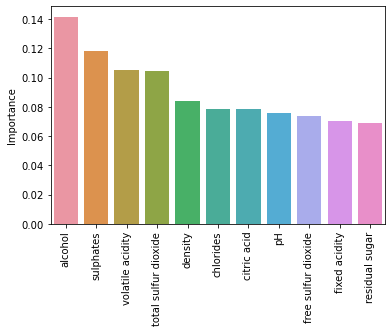

In [415]:
# Extracting the feature importances for the model and creating a dataframe with the features and their respective importances
# Creating a barplot that shows the importance of the features
feats = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
important_feats = feats.sort_values('Importance', ascending=False)
sns.barplot(data=important_feats, x=important_feats.index, y='Importance')
plt.xticks(rotation=90);

In [429]:
# Feature importances using SHAP and plotting the top 5
tree_explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = tree_explainer.shap_values(scaled_X_test)

In [419]:
abs_mean_shap = np.mean(np.array([np.absolute(np.array(shap_values[0])), np.absolute(np.array(shap_values[1]))]), axis=0)

In [421]:
shap_df = pd.DataFrame(data=abs_mean_shap, columns=X_test.columns)
shap_avg_df = pd.DataFrame(shap_df.mean().to_dict(),index=[shap_df.index.values[-1]])

In [422]:
shap_plot_df = shap_avg_df.T.reset_index()
shap_plot_df.columns = ['Feature', 'Mean ABS SHAP']

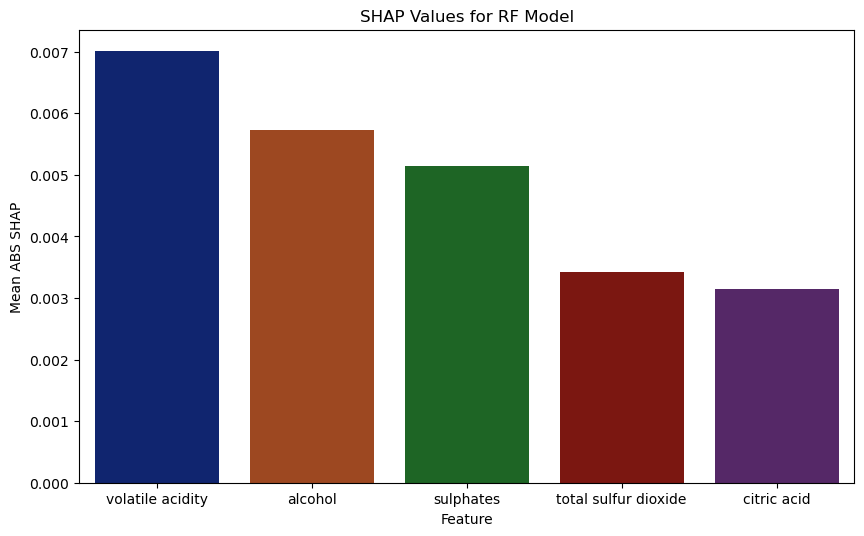

In [426]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(data=shap_plot_df.sort_values(by='Mean ABS SHAP', ascending=False).head(n=5), x='Feature', y='Mean ABS SHAP', palette="dark").set(title="SHAP Values for RF Model")
plt.show()